In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/case_dataset.csv')
games_df = pd.read_csv('data/dictionary_games_category.csv')

# Сет игроко
players_df = df[~df['games'].apply(lambda x: x == '{}')]

# Сет неиграющих юзеров
nonplayers_df = df[~df['games'].apply(lambda x: x != '{}')]

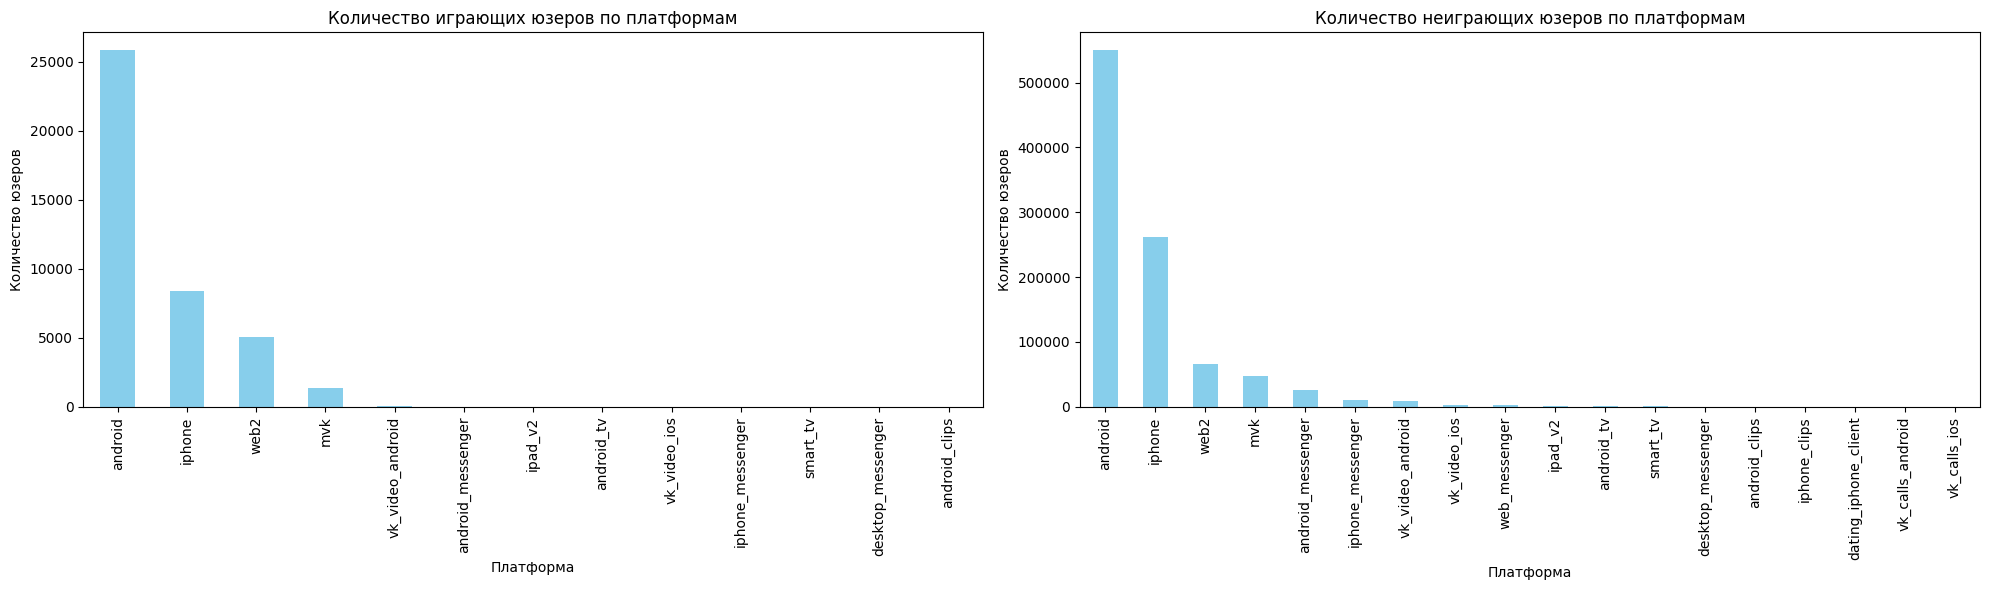

In [24]:
player_platforms = players_df.heavy_vk_platform.value_counts()
nonplayer_platforms = nonplayers_df.heavy_vk_platform.value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

player_platforms.plot(kind='bar', color='skyblue', ax=ax1)
nonplayer_platforms.plot(kind='bar', color='skyblue', ax=ax2)

ax1.set_title('Количество играющих юзеров по платформам')
ax1.set_xlabel('Платформа')
ax1.set_ylabel('Количество юзеров')

ax2.set_title('Количество неиграющих юзеров по платформам')
ax2.set_xlabel('Платформа')
ax2.set_ylabel('Количество юзеров')

plt.tight_layout()
plt.show()

По данному графику, мы видим, что основной популярностью среди пользователей всё так же пользуются привычные классическое приложение VK для мобилок (Android и Iphone), а также браузерные версии сайта, как для мобилки, так и для десктопа. Из этого следует, что нам не стоит распыляться на рекламу, продвижение сервиса игр среди других платформ.

In [11]:
df.columns

Index(['Unnamed: 0', 'country_id', 'age', 'sex', 'friends',
       'heavy_vk_platform', 'vk_platforms_array', 'days_in_vk', 'avg_daily_ts',
       'days_in_feed', 'avg_daily_ts_feed', 'days_in_clips',
       'avg_daily_ts_clips', 'days_in_video', 'avg_daily_ts_video',
       'days_in_messages', 'avg_daily_ts_messages', 'days_in_games',
       'avg_daily_ts_games', 'games_revenue_in_app', 'games_revenue_ads',
       'total_revenue_vk', 'games', 'final_cluster', 'interest_array'],
      dtype='object')

## Заработок по платформам среди всех юзеров

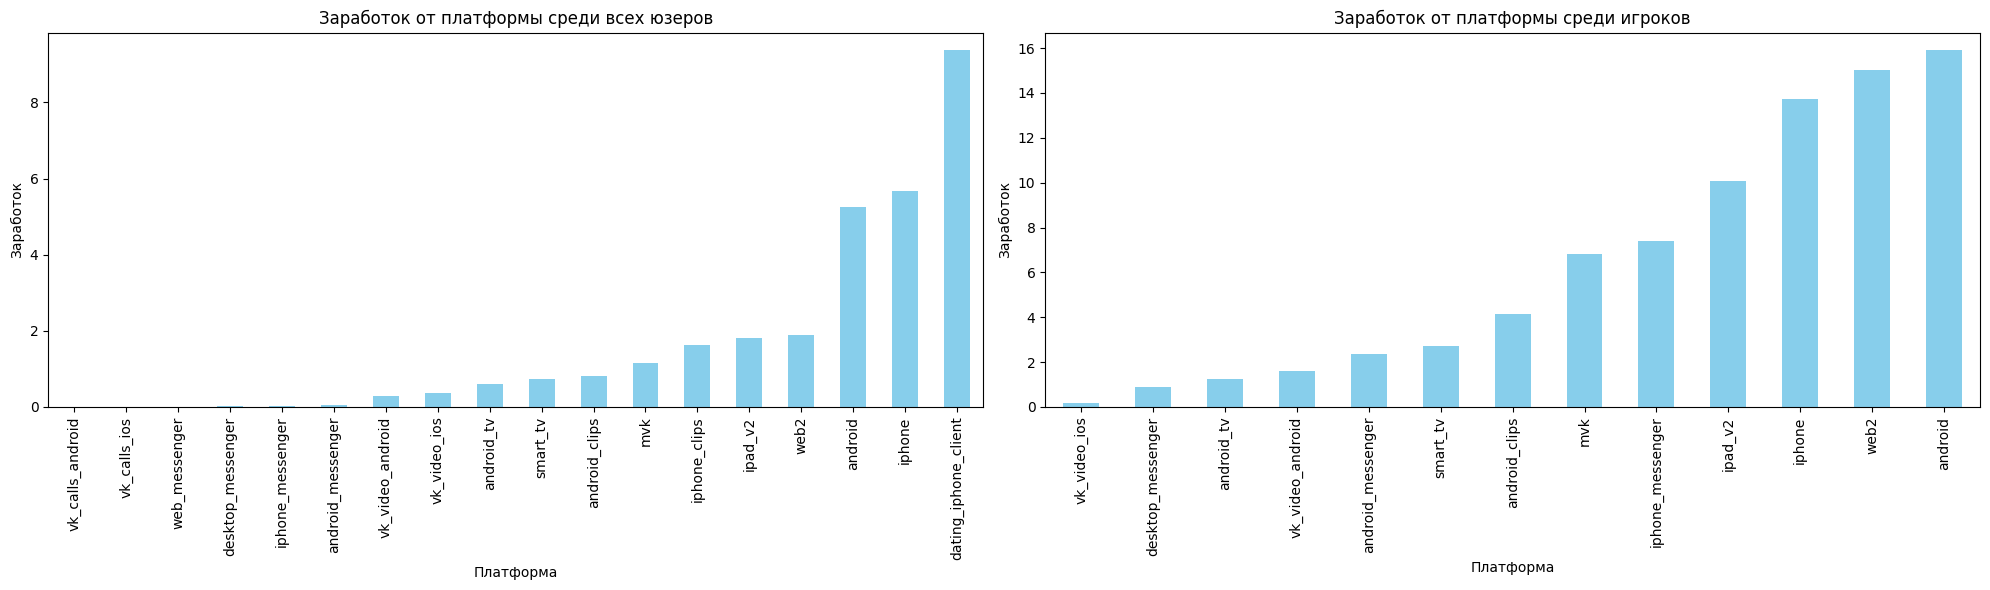

In [25]:
all_payments = df.groupby('heavy_vk_platform').total_revenue_vk.mean().sort_values()
players_payments = players_df.groupby('heavy_vk_platform').total_revenue_vk.mean().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

all_payments.plot(kind='bar', color='skyblue', ax=ax1)
players_payments.plot(kind='bar', color='skyblue', ax=ax2)

ax1.set_title('Заработок от платформы среди всех юзеров')
ax1.set_xlabel('Платформа')
ax1.set_ylabel('Заработок')

ax2.set_title('Заработок от платформы среди игроков')
ax2.set_xlabel('Платформа')
ax2.set_ylabel('Заработок')

plt.tight_layout()
plt.show()

Из данного графика, видно, что наиболее охотно приносят деньги компании пользователи iphone, особенно те, кто сидят в приложении для знакомств. Исходя из этого, можно сделать вывод, что размещение рекламы VK игр в этом сервисе - очень хороший ход, особенно, если продумать интеграции игр с vk знакомствами для облегчения знакомства между людьми.

## Заработок с игр по платформам

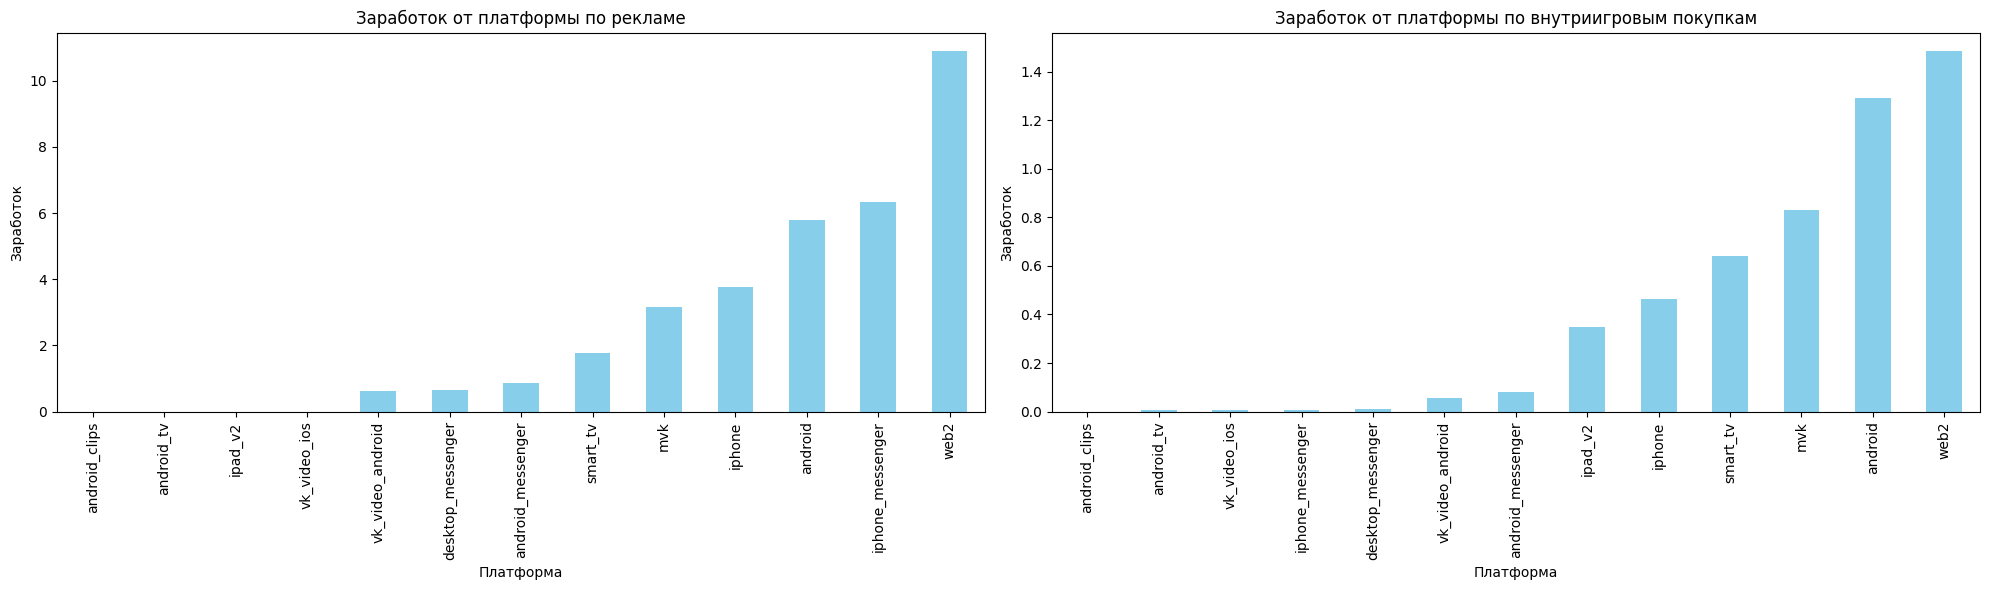

In [26]:
ads_payments = players_df.groupby('heavy_vk_platform').games_revenue_in_app.mean().sort_values()
game_payments = players_df.groupby('heavy_vk_platform').games_revenue_ads.mean().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
ads_payments.plot(kind='bar', color='skyblue', ax=ax1)
game_payments.plot(kind='bar', color='skyblue', ax=ax2)

ax1.set_title('Заработок от платформы по рекламе')
ax1.set_xlabel('Платформа')
ax1.set_ylabel('Заработок')

ax2.set_title('Заработок от платформы по внутриигровым покупкам')
ax2.set_xlabel('Платформа')
ax2.set_ylabel('Заработок')

plt.tight_layout()
plt.show()

По данным графикам, мы видим, что больше всего денег с рекламы и с покупок внутри игр приносит браузер.

Здесь стоит отталкиваться от того, что встроить нативную рекламу в браузер намного проще, отсюда и увеличенный заработок по рекламе. Что касается внутриигровых покупок, то тут стоит оттолкнуться от того, что с ПК просто удобнее платить для многих (ведь у нас большая часть платёжеспособной аудитории - 40+), более того, это говорит о том, что многие игры, в которые готовы вкладывать деньги, скорее всего не поддерживаются на мобилке.